In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score



In [ ]:
df =pd.read_csv('adult.csv', sep=',')
len(df)
df


,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df = df[(df.astype(str) != ' ?').all(axis=1)]
len(df)

32561

In [ ]:
# Create a new income_bi column
df['income_bi'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)
# Remove redundant columns
df = df.drop(['income','fnlwgt','capital-gain','capital-loss','native-country'], axis=1)
df

,age,workClass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income_bi
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,0


In [ ]:
df = pd.get_dummies(df, columns=['workClass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [ ]:
df = df.sample(frac=1)
# split training and testing data
d_train = df[:25000]
d_test = df[25000:]
d_train_att = d_train.drop(['income_bi'], axis=1)
d_train_gt50 = d_train['income_bi']
d_test_att = d_test.drop(['income_bi'], axis=1)
d_test_gt50 = d_test['income_bi']
d_att = df.drop(['income_bi'], axis=1)
d_gt50 = df['income_bi']
# number of income > 50K in whole dataset:
print("Income >50K: %d out of %d (%.2f%%)" % (np.sum(d_gt50), len(d_gt50), 100*float(np.sum(d_gt50)) / len(d_gt50)))
# Income >50K: 7508 out of 30162 (24.89%)

Income >50K: 7841 out of 32561 (24.08%)


In [ ]:
# Fit a decision tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
t = t.fit(d_train_att, d_train_gt50)

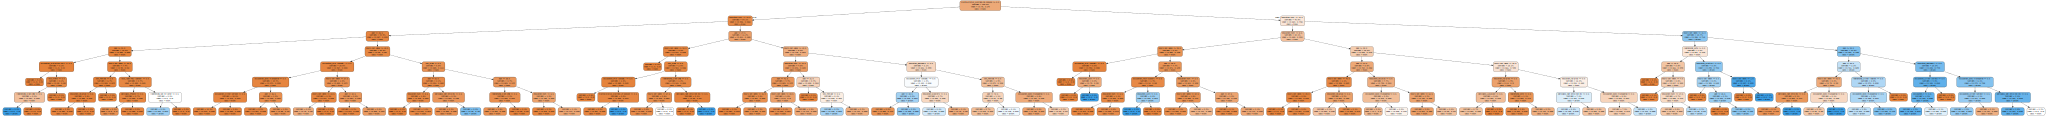

In [ ]:
# Visualize tree
dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(d_train_att), class_names=['lt50K', 'gt50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
t.score(d_test_att, d_test_gt50)

0.8283295860335934

In [ ]:
scores = cross_val_score(t, d_att, d_gt50, cv=5)
# Show avarage score and +/- two standard deviations away (covering 95% or scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))
# Accuracy: 0.83 (+/- 0.00)

Accuracy: 0.83 (+/- 0.01)


In [ ]:
df.iloc[[0]].to_csv('prediction.csv', sep=',', encoding='utf-8', index=False)

In [ ]:
# Prepare user profile
sample_df = pd.read_csv('prediction.csv', sep=',')
sample_df = sample_df.drop(['income_bi'], axis=1)
# Start predicting 
predict_value = sample_df.iloc[0]
y_predict = t.predict([predict_value.tolist()])
y_predict[0] #0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [ ]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_gt50, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.76 (+/- 0.00)
Max depth: 2, Accuracy: 0.82 (+/- 0.01)
Max depth: 3, Accuracy: 0.82 (+/- 0.01)
Max depth: 4, Accuracy: 0.82 (+/- 0.01)
Max depth: 5, Accuracy: 0.82 (+/- 0.01)
Max depth: 6, Accuracy: 0.83 (+/- 0.01)
Max depth: 7, Accuracy: 0.83 (+/- 0.01)
Max depth: 8, Accuracy: 0.83 (+/- 0.01)
Max depth: 9, Accuracy: 0.83 (+/- 0.01)
Max depth: 10, Accuracy: 0.83 (+/- 0.01)
Max depth: 11, Accuracy: 0.83 (+/- 0.01)
Max depth: 12, Accuracy: 0.83 (+/- 0.01)
Max depth: 13, Accuracy: 0.82 (+/- 0.01)
Max depth: 14, Accuracy: 0.82 (+/- 0.00)
Max depth: 15, Accuracy: 0.82 (+/- 0.01)
Max depth: 16, Accuracy: 0.82 (+/- 0.00)
Max depth: 17, Accuracy: 0.81 (+/- 0.00)
Max depth: 18, Accuracy: 0.81 (+/- 0.01)
Max depth: 19, Accuracy: 0.81 (+/- 0.00)
